<a href="https://colab.research.google.com/github/Mifekmk/SkillTreePython-DataAnalysis/blob/main/%EA%B3%BC%EC%A0%9C2_%ED%95%B4%EC%99%B8_%EC%B6%95%EA%B5%AC_%EC%84%A0%EC%88%98_%EC%9D%B4%EC%A0%81%EB%A3%8C_%EC%98%88%EC%B8%A1_%EB%AF%B8%EC%85%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

test=pd.read_csv('/content/FIFA_test.csv', encoding='utf-8')
train = pd.read_csv('/content/FIFA_train.csv', encoding='utf-8')
submission = pd.read_csv('/content/submission.csv',encoding='utf-8')
print(test.shape, train.shape, submission.shape)

for col in train.columns:
  n_unique = len(train[col].unique()) # 고유값 개수
  print( col, n_unique ) # 컬럼명과 고유값 개수 출력

(3828, 11) (8932, 12) (3828, 2)
id 8932
name 8932
age 25
continent 5
contract_until 17
position 4
prefer_foot 2
reputation 5
stat_overall 46
stat_potential 45
stat_skill_moves 5
value 198


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [ ]:
train.corr().style.background_gradient(cmap='Blues_r')

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
id,1.000000,-0.475785,-0.423739,-0.972374,-0.630199,-0.402455,-0.544280
age,-0.475785,1.000000,0.263468,0.467345,-0.231303,0.039362,0.087319
reputation,-0.423739,0.263468,1.000000,0.521389,0.399183,0.196582,0.665982
stat_overall,-0.972374,0.467345,0.521389,1.000000,0.665453,0.400164,0.658444
stat_potential,-0.630199,-0.231303,0.399183,0.665453,1.000000,0.332578,0.611907
stat_skill_moves,-0.402455,0.039362,0.196582,0.400164,0.332578,1.000000,0.298500
value,-0.544280,0.087319,0.665982,0.658444,0.611907,0.298500,1.000000


# reputation과 stat_overall이 상관관계를 가집니다.

In [ ]:
train.drop(['id','name'],axis=1,inplace=True) # 필요없는 데이터 삭제
test.drop(['id','name'],axis=1, inplace=True)

In [ ]:
train.contract_until.value_counts() # 계약기간 값들을 정렬할 수 있습니다.
# value_counts()는 각 종류별로 몇 개의 데이터가 있는지 세어주는 것입니다.

2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              12
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
2026               1
May 31, 2020       1
Jan 12, 2019       1
Name: contract_until, dtype: int64

In [ ]:
# 계약 연도만 추출
def func(string:object) -> int:
    """계약 연도만 추출하여 int로 반환"""
    string = string[-4:] # 계약연도가 보통 제일 끝에 있으므로 or 단독으로 쓰이므로 뒤에서 4번째부터 가지고 와줍니다.
    return int(string)

train['contract_until'] = train['contract_until'].apply(func)
test['contract_until'] = test['contract_until'].apply(func)

In [ ]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8932 non-null   int64  
 1   continent         8932 non-null   object 
 2   contract_until    8932 non-null   int64  
 3   position          8932 non-null   object 
 4   prefer_foot       8932 non-null   object 
 5   reputation        8932 non-null   float64
 6   stat_overall      8932 non-null   int64  
 7   stat_potential    8932 non-null   int64  
 8   stat_skill_moves  8932 non-null   float64
 9   value             8932 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 697.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               3828 non-null   int64  
 1   continent    

(None, None)

In [ ]:
# 문자형 변수 label 인코딩 진행
train['continent']=train['continent'].astype('category').cat.codes
test['continent'] = test['continent'].astype('category').cat.codes

train['position'] = train['position'].astype('category').cat.codes
test['position'] = test['position'].astype('category').cat.codes

train['prefer_foot'] = train['prefer_foot'].astype('category').cat.codes
test['prefer_foot'] = test['prefer_foot'].astype('category').cat.codes

In [ ]:
train.info(), test.info()

from sklearn.model_selection import train_test_split
X = train.drop(['value'],axis=1)
y = train['value']

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8932 non-null   int64  
 1   continent         8932 non-null   int8   
 2   contract_until    8932 non-null   int64  
 3   position          8932 non-null   int8   
 4   prefer_foot       8932 non-null   int8   
 5   reputation        8932 non-null   float64
 6   stat_overall      8932 non-null   int64  
 7   stat_potential    8932 non-null   int64  
 8   stat_skill_moves  8932 non-null   float64
 9   value             8932 non-null   float64
dtypes: float64(3), int64(4), int8(3)
memory usage: 514.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               3828 non-null   int64  
 1   continent       

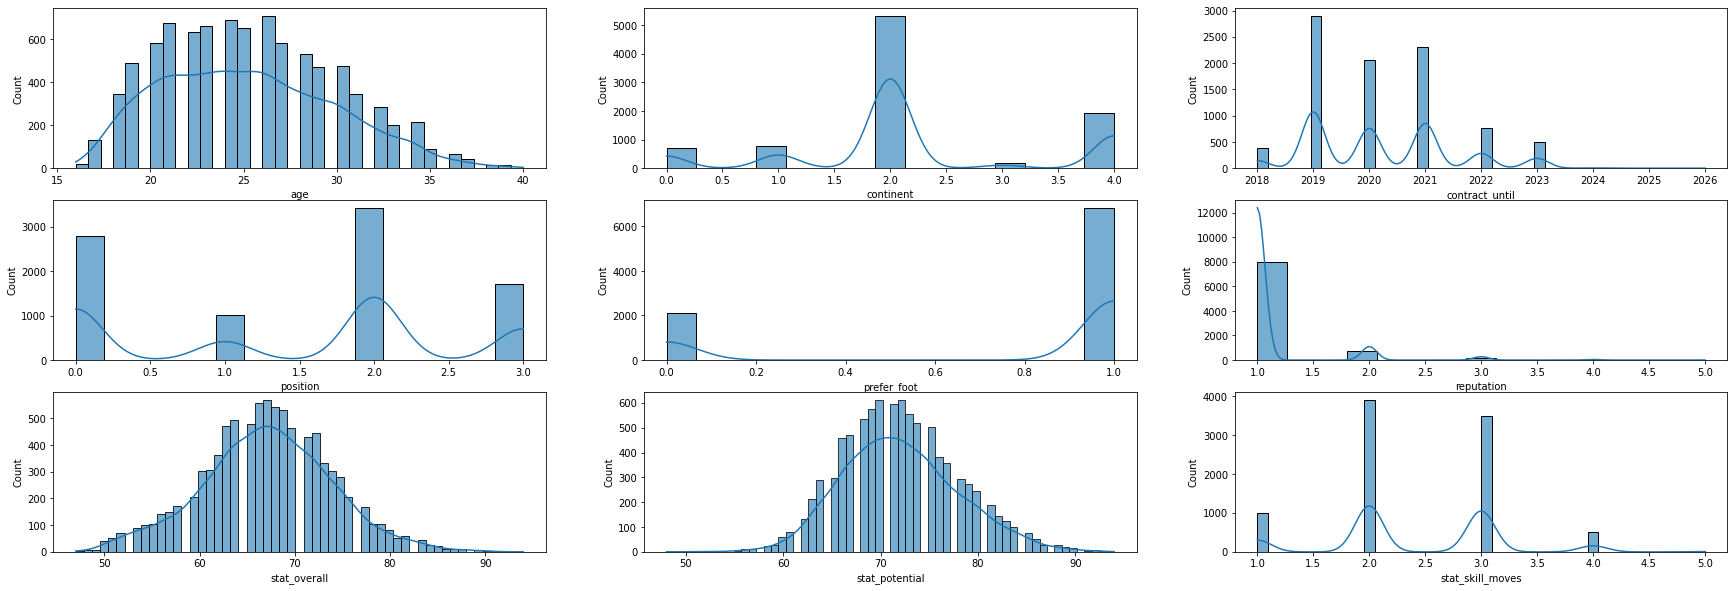

In [ ]:
f, axes = plt.subplots(3,3, figsize=(30,10)) # 변수가 10개 이므로 subplots을 (2,5) 로 설정해주었습니다.
axes = axes.flatten()
for col,ax in zip(X.columns, axes):
    sns.histplot(data = X, x=col, ax=ax, alpha=0.6, kde=True)
plt.show()

In [ ]:
X.corr().style.background_gradient(cmap='Blues')

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
age,1.000000,0.091028,-0.132052,-0.079128,0.007760,0.263468,0.467345,-0.231303,0.039362
continent,0.091028,1.000000,0.040910,-0.020053,-0.019312,0.012608,0.099486,0.072312,0.012365
contract_until,-0.132052,0.040910,1.000000,0.020076,-0.004760,0.070446,0.156983,0.258477,0.082641
position,-0.079128,-0.020053,0.020076,1.000000,0.105502,0.031215,0.015825,0.069233,0.384022
prefer_foot,0.007760,-0.019312,-0.004760,0.105502,1.000000,0.003859,-0.036585,-0.029030,-0.109107
reputation,0.263468,0.012608,0.070446,0.031215,0.003859,1.000000,0.521389,0.399183,0.196582
stat_overall,0.467345,0.099486,0.156983,0.015825,-0.036585,0.521389,1.000000,0.665453,0.400164
stat_potential,-0.231303,0.072312,0.258477,0.069233,-0.029030,0.399183,0.665453,1.000000,0.332578
stat_skill_moves,0.039362,0.012365,0.082641,0.384022,-0.109107,0.196582,0.400164,0.332578,1.000000


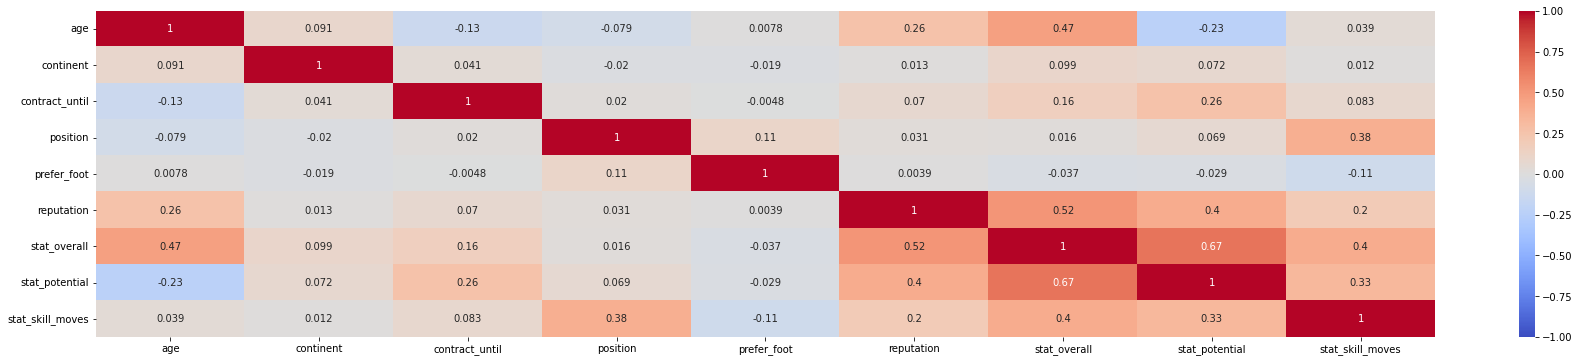

In [ ]:
plt.figure(figsize=(30,6))
sns.heatmap(X.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1)
plt.show()

In [ ]:
train.columns

Index(['age', 'continent', 'contract_until', 'position', 'prefer_foot',
       'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves',
       'value'],
      dtype='object')

In [ ]:
X = train['reputation'].values
X = X.reshape(-1,1)
X.shape

(8932, 1)

In [ ]:
y = train['value'].values
y = y.reshape(-1,1)
y.shape

(8932, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7145, 1), (1787, 1), (7145, 1), (1787, 1))

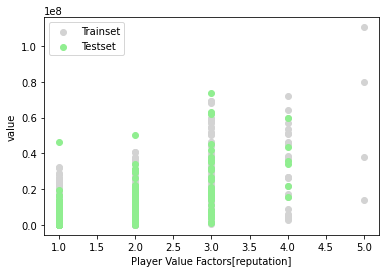

In [ ]:
def draw_data():
  plt.scatter(X_train, y_train, label='Trainset', color='lightgray')
  plt.scatter(X_test, y_test, label='Testset', color='lightgreen')
  plt.xlabel('Player Value Factors[reputation]')
  plt.ylabel('value')
  plt.legend()
draw_data()

In [ ]:
X = train['stat_overall'].values
X = X.reshape(-1,1)
X.shape

(8932, 1)

In [ ]:
y = train['value'].values
y = y.reshape(-1,1)
y.shape

(8932, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7145, 1), (1787, 1), (7145, 1), (1787, 1))

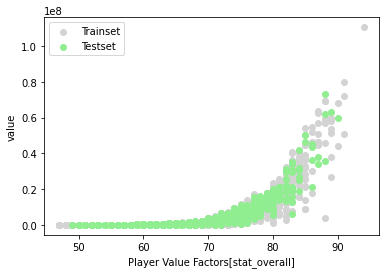

In [ ]:
def draw_data():
  plt.scatter(X_train, y_train, label='Trainset', color='lightgray')
  plt.scatter(X_test, y_test, label='Testset', color='lightgreen')
  plt.xlabel('Player Value Factors[stat_overall]')
  plt.ylabel('value')
  plt.legend()
draw_data()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# X가 1차항 -> 다차항으로 변환
quad = PolynomialFeatures(degree=2) # 차수 지정(2차항)
# X 변환
X_quad = quad.fit_transform(X)
X.shape, X_quad.shape

((8932, 1), (8932, 3))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7145, 1), (1787, 1), (7145, 1), (1787, 1))

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()
sc_x.fit(X_train)
sc_y.fit(y_train[:np.newaxis])

StandardScaler()

In [ ]:
X_train = sc_x.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train[:np.newaxis]).flatten() # .flatten으로 한 방향으로 쭉 나열해줍니다.
print(X_train.shape, y_train.shape)

(7145, 1) (7145,)


In [ ]:
X_test = sc_x.fit_transform(X_test)
y_test = sc_y.fit_transform(y_test[:np.newaxis]).flatten()
print(X_test.shape, y_test.shape)

(1787, 1) (1787,)


In [ ]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr2 = LinearRegression()
quad =  PolynomialFeatures(degree=2)
X_quad = quad.fit_transform(X_train)
lr2.fit(X_quad, y_train)

LinearRegression()

In [ ]:
# 모델링 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
train_x = train.drop('value', axis=1)
train_y = train['value']

model = RandomForestRegressor()
model.fit(train_x, train_y)

lr3 = LinearRegression()
cubic = PolynomialFeatures(degree=3)
X_cubic = cubic.fit_transform(X_train)
lr3.fit(X_cubic, y_train)

pred = model.predict(test)
submission['value'] = pred
submission.head()

,id,value
0,1,75870000.0
1,2,77355000.0
2,4,68010000.0
3,5,70030000.0
4,6,61010000.0


In [ ]:
lr3 = LinearRegression()
cubic = PolynomialFeatures(degree=3)
X_cubic = cubic.fit_transform(X_train)
lr3.fit(X_cubic, y_train)

LinearRegression()

In [ ]:
pred = model.predict(test)
submission['value'] = pred
submission.head()

,id,value
0,1,75870000.0
1,2,77355000.0
2,4,68010000.0
3,5,70030000.0
4,6,61010000.0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# 함수정리
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs(y_true-y_pred) / y_true) * 100

def norm_mean_absolute_error(y_true, y_pred):
  return mean_absolute_error(y_true, y_pred)/np.mean(np.abs(y_true))

def regression_scores(y_true,y_pred):
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  mae = mean_absolute_error(y_true, y_pred)
  nmae = norm_mean_absolute_error(y_true, y_pred)
  mape = mean_absolute_percentage_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)
  return {'mse':np.round(mse,3), 'rmse':np.round(rmse,3), 'mae':np.round(mae,3), 'nmae':np.round(nmae,3), 'mape':np.round(mape,3), 'r2':np.round(r2,3) }

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

y_pred1 = lr1.predict(X_test)
y_pred2 = lr2.predict(quad.fit_transform(X_test))
y_pred3 = lr3.predict(cubic.fit_transform(X_test))

l1_scores = regression_scores(y_test, y_pred1)
l2_scores = regression_scores(y_test, y_pred2)
l3_scores = regression_scores(y_test, y_pred3)

df_score = pd.DataFrame([l1_scores,l2_scores,l3_scores], index=['linear', 'quadratic', 'cubic'])
df_score.style.background_gradient()



,mse,rmse,mae,nmae,mape,r2
linear,0.558000,0.747000,0.420000,0.800000,-13.124000,0.442000
quadratic,0.198000,0.445000,0.256000,0.488000,-8.851000,0.802000
cubic,0.098000,0.313000,0.142000,0.271000,6.585000,0.902000


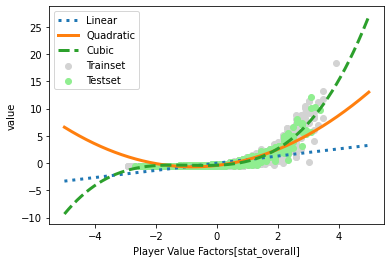

In [ ]:
draw_data()
x_every = np.arange(-5,5,0.01).reshape(-1,1)
plt.plot(x_every, lr1.predict(x_every),
         label='Linear',
         linewidth=3, linestyle=':') # 1차항

plt.plot(x_every, lr2.predict(quad.fit_transform(x_every)),
         label='Quadratic',
         linewidth=3) # 2차항

plt.plot(x_every, lr3.predict(cubic.fit_transform(x_every)),
         label='Cubic',
         linewidth=3, linestyle='--') # 3차항
plt.legend()
plt.show()

In [ ]:
# 결정트리 회귀
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=1,
                             max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=1)

In [ ]:
y_pred = tree.predict(X_test)
score = regression_scores(y_test, y_pred)
score
df_score.loc['tree'] = score # 행 추가
df_score.style.background_gradient(cmap='Blues_r')

,mse,rmse,mae,nmae,mape,r2
linear,0.558000,0.747000,0.420000,0.800000,-13.124000,0.442000
quadratic,0.198000,0.445000,0.256000,0.488000,-8.851000,0.802000
cubic,0.098000,0.313000,0.142000,0.271000,6.585000,0.902000
tree,0.135000,0.367000,0.156000,0.297000,0.894000,0.865000


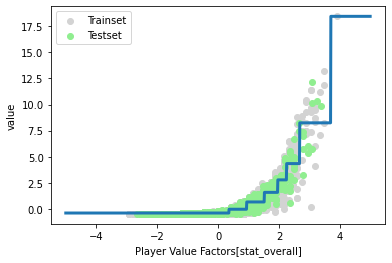

In [ ]:
draw_data()
plt.plot(x_every, tree.predict(x_every), lw=3)
plt.show()

In [ ]:
# 랜덤 포레스트 회귀(Random Forest Reegression)
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state=1)
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [ ]:
y_pred = forest.predict(X_test)
score = regression_scores(y_test, y_pred)
df_score.loc['forest'] = score
df_score.style.background_gradient(cmap='Blues_r')

,mse,rmse,mae,nmae,mape,r2
linear,0.558000,0.747000,0.420000,0.800000,-13.124000,0.442000
quadratic,0.198000,0.445000,0.256000,0.488000,-8.851000,0.802000
cubic,0.098000,0.313000,0.142000,0.271000,6.585000,0.902000
tree,0.135000,0.367000,0.156000,0.297000,0.894000,0.865000
forest,0.107000,0.326000,0.123000,0.234000,10.188000,0.893000


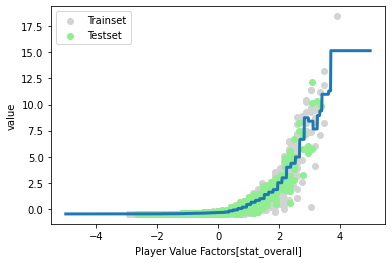

In [ ]:
draw_data()
plt.plot(x_every, forest.predict(x_every), lw=3)
plt.show()

In [ ]:
# 엑스트라 트리
from sklearn.ensemble import ExtraTreesRegressor

et = ExtraTreesRegressor(random_state=1)
et.fit(X_train, y_train)

ExtraTreesRegressor(random_state=1)

In [ ]:
y_pred = et.predict(X_test)
score = regression_scores(y_test, y_pred)
score
df_score.loc['et'] = score # 행 추가
df_score.style.background_gradient(cmap='Blues_r')

,mse,rmse,mae,nmae,mape,r2
linear,0.558000,0.747000,0.420000,0.800000,-13.124000,0.442000
quadratic,0.198000,0.445000,0.256000,0.488000,-8.851000,0.802000
cubic,0.098000,0.313000,0.142000,0.271000,6.585000,0.902000
tree,0.135000,0.367000,0.156000,0.297000,0.894000,0.865000
forest,0.107000,0.326000,0.123000,0.234000,10.188000,0.893000
et,0.104000,0.322000,0.121000,0.231000,10.330000,0.896000


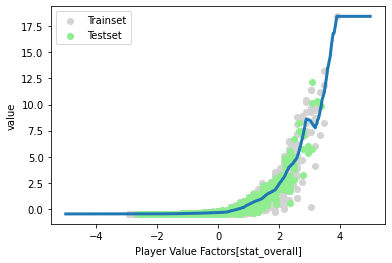

In [ ]:
draw_data()
plt.plot(x_every, et.predict(x_every), lw=3)
plt.show()

In [ ]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=1)
gb.fit(X_train,y_train)

GradientBoostingRegressor(random_state=1)

In [ ]:
y_pred = gb.predict(X_test)
score = regression_scores(y_test, y_pred)
df_score.loc['GradientBoostingRegressor'] = score
df_score.style.background_gradient(cmap='Blues_r')

,mse,rmse,mae,nmae,mape,r2
linear,0.558000,0.747000,0.420000,0.800000,-13.124000,0.442000
quadratic,0.198000,0.445000,0.256000,0.488000,-8.851000,0.802000
cubic,0.098000,0.313000,0.142000,0.271000,6.585000,0.902000
tree,0.135000,0.367000,0.156000,0.297000,0.894000,0.865000
forest,0.107000,0.326000,0.123000,0.234000,10.188000,0.893000
et,0.104000,0.322000,0.121000,0.231000,10.330000,0.896000
GradientBoostingRegressor,0.105000,0.324000,0.123000,0.233000,10.227000,0.895000


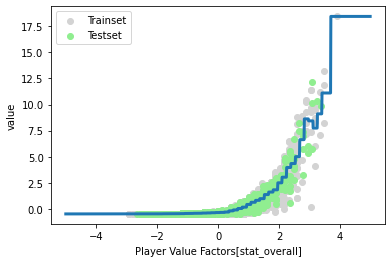

In [ ]:
draw_data()
plt.plot(x_every, gb.predict(x_every), lw=3)
plt.show()

In [ ]:
# XGBoost Regressor
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=1)
xgb.fit(X_train, y_train)

[04:37:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=1)

In [ ]:
y_pred = xgb.predict(X_test)
score = regression_scores(y_test, y_pred)
df_score.loc['xgb'] = score
df_score.style.background_gradient(cmap='Blues_r')

,mse,rmse,mae,nmae,mape,r2
linear,0.558000,0.747000,0.420000,0.800000,-13.124000,0.442000
quadratic,0.198000,0.445000,0.256000,0.488000,-8.851000,0.802000
cubic,0.098000,0.313000,0.142000,0.271000,6.585000,0.902000
tree,0.135000,0.367000,0.156000,0.297000,0.894000,0.865000
forest,0.107000,0.326000,0.123000,0.234000,10.188000,0.893000
et,0.104000,0.322000,0.121000,0.231000,10.330000,0.896000
GradientBoostingRegressor,0.105000,0.324000,0.123000,0.233000,10.227000,0.895000
xgb,0.105000,0.323000,0.123000,0.233000,10.220000,0.895000


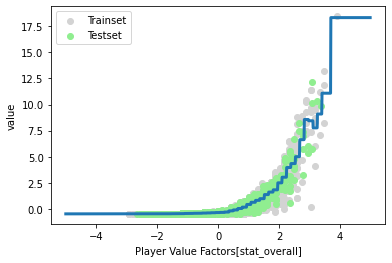

In [ ]:
draw_data()
plt.plot(x_every, xgb.predict(x_every), lw=3)
plt.show()

In [ ]:
pred = model.predict(test)

In [ ]:
submission['value'] = pred

In [ ]:
submission.head() # linear regression

,id,value
0,1,75870000.0
1,2,77355000.0
2,4,68010000.0
3,5,70030000.0
4,6,61010000.0


In [ ]:
# 모델링 
from sklearn.ensemble import RandomForestRegressor

train_x = train.drop('value', axis=1)
train_y = train['value']

model = RandomForestRegressor()
model.fit(train_x, train_y)

RandomForestRegressor()

In [ ]:
pred = model.predict(test)
submission['value'] = pred
submission.head()

In [ ]:
submission['value'] = pred

In [ ]:
submission.head()

,id,value
0,1,81620000.0
1,2,78990000.0
2,4,69340000.0
3,5,71580000.0
4,6,63540000.0


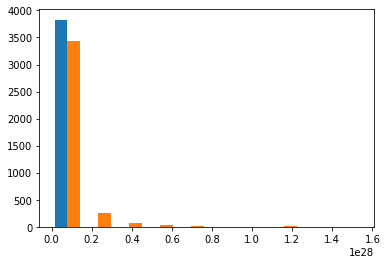

In [ ]:
import matplotlib.pyplot  as plt
_ = plt.hist(submission)

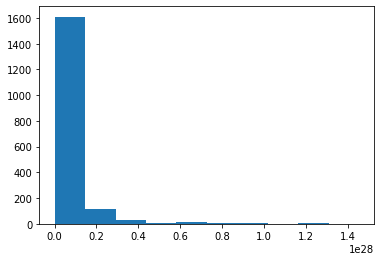

In [ ]:
# 정규화에서 원위치 시키는 방법
y_test = sc_y.inverse_transform(np.expand_dims(y_test,1)).flatten() # 인풋은 .flatten 처리 해야합니다.
_ = plt.hist(y_test)
# inverse_transform()


In [ ]:
# 모델링 
from sklearn.preprocessing import PolynomialFeatures

train_x = train.drop('value', axis=1)
train_y = train['value']

model = RandomForestRegressor()
model.fit(train_x, train_y)

lr3 = LinearRegression()
cubic = PolynomialFeatures(degree=3)
X_cubic = cubic.fit_transform(X_train)
lr3.fit(X_cubic, y_train)

pred = model.predict(test)
submission['value'] = pred
submission.head()

,id,value
0,1,75060000.0
1,2,79345000.0
2,4,69030000.0
3,5,71440000.0
4,6,62125000.0


In [ ]:
submission = sc_y.inverse_transform(submission)
submission

array([[2.92103982e+20, 1.54383012e+28],
       [4.89980182e+20, 1.54887597e+28],
       [8.85732582e+20, 1.33655480e+28],
       ...,
       [3.35053405e+24, 1.18726662e+25],
       [3.35152343e+24, 1.01313557e+25],
       [3.35271069e+24, 1.02302938e+25]])

##### 문제에서는 RMSE를 기준으로 최적화 검사를 진행하라는 지시가 있었고, 가장 정밀도가 높은 모델이 3차항으로 나오게 되었습니다.
___

In [ ]:
submission.to_csv('미래 선수가치 자료.csv', index=False)

## 데이터를 정규화 하는 두 가지 방법
### 1. Min-Max Normalization(최소-최대 정규화)
### 2. Z-Score Normalizarion(Z-점수 정규화)

In [ ]:
# 최소-최대 정규화
def min_max_normalize(lst):
    normalized = []
    
    for value in lst:
        normalized_num = (value - min(lst)) / (max(lst) - min(lst))
        normalized.append(normalized_num)
    
    return normalized
# 이상치(outlier)에 너무 많은 영향을 받습니다.

In [ ]:
# Z-점수 정규화는 이상치(outlier) 문제를 피하는 데이터 정규화 전략입니다.
# X라는 값을 Z-점수로 바꿔줍니다. [식 : ( X - 평균 ) / 표준편차 ]
# 만약 feature의 값이 평균과 일치하면 0으로 정규화되겠으나, 평균보다 작으면 음수, 평균보다 크면 양수로 나타납니다. 
# 데이터의 표준편차가 크면 (값이 넓게 퍼져있으면) 정규화되는 값이 0에 가까워집니다.

def z_score_normalize(lst):
    normalized = []
    for value in lst:
        normalized_num = (value - np.mean(lst)) / np.std(lst)
        normalized.append(normalized_num)
    return normalized

In [ ]:
# 최소 최대 정규화 : 모든 feature들의 스케일이 동일하지만, 이상치를 잘 처리하지 못합니다.
# Z-점수 정규화 : 이상치를 잘 처리하지만, 정확히 동일한 척도로 정규화 된 데이터를 생성하지는 않습니다.
